In [1]:
#自动重载
import os
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2
from PIL import ImageEnhance
from utils import mask2yolo,make_pic
from tqdm import tqdm
mainpath = "./datasets/"
bg_path = "bg/"
fg_path = "fg_2/"
masks_path = "masks/"
fgs = os.listdir(mainpath+fg_path)
bgs = os.listdir(mainpath+bg_path)
masks = os.listdir(mainpath+masks_path)

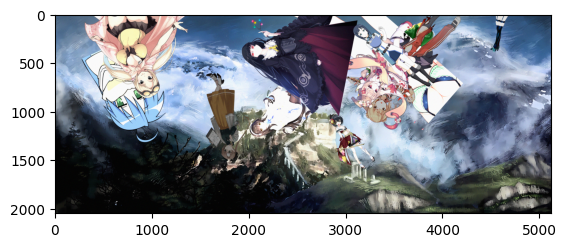

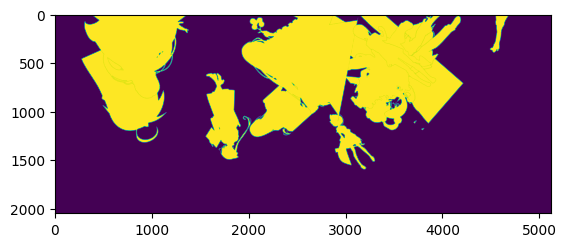

min_mask_size:27984.76862745098
194470.0
28224.0
2023959.5
867600.5


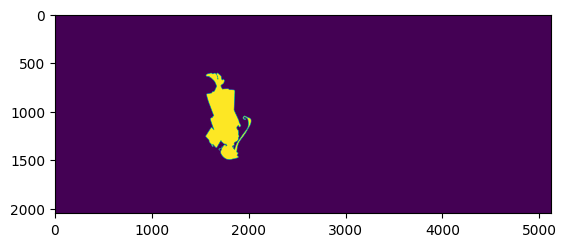

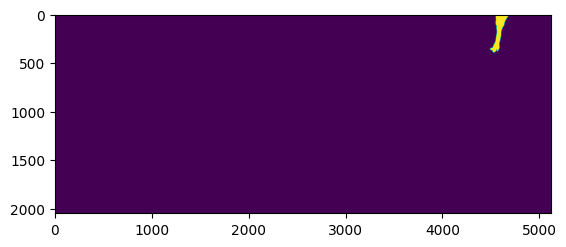

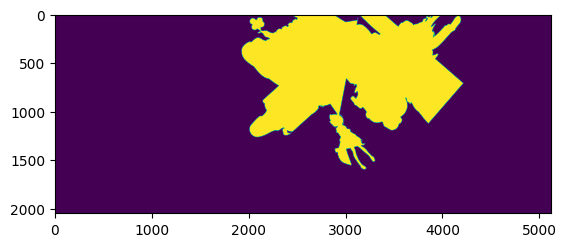

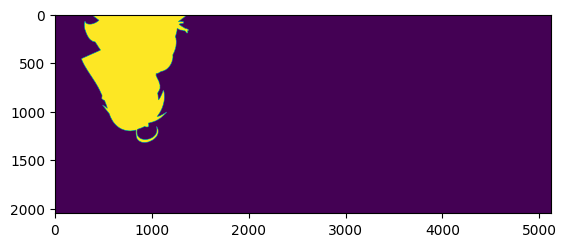

In [4]:
k = np.random.randint(len(fgs))

test_fg_list = [mainpath+fg_path+fg for fg in fgs[k:k+12]]
test_bg = mainpath+bg_path+bgs[810]
test_mask_list = [mainpath+masks_path+mask for mask in masks[k:k+12]]
mixed_pic,mixed_mask, mask_sizes = make_pic(test_fg_list,test_bg,test_mask_list)
# 打印出来看看
plt.imshow(mixed_pic)
plt.show()
mixed_mask = np.array(mixed_mask)
plt.imshow(mixed_mask)
plt.show()
yolo, mas, poligons = mask2yolo(mixed_mask,mask_sizes,show=True)
plt.imshow(mas)
for i in poligons:
    zeros = np.zeros(mixed_pic.size[::-1], np.uint8)
    cv2.fillPoly(zeros, [np.array(i).reshape(-1, 2)], (255, 255, 255))
    plt.imshow(zeros)
    plt.show()

In [3]:
k = np.random.randint(len(fgs))

test_fg_list = [mainpath+fg_path+fg for fg in fgs[k:k+12]]
test_bg = mainpath+bg_path+bgs[810]
test_mask_list = [mainpath+masks_path+mask for mask in masks[k:k+12]]
mixed_pic,mixed_mask, mask_sizes = make_pic(test_fg_list,test_bg,test_mask_list)


In [5]:
min(mask_sizes)

48249.41176470588

[15  0  1]
3


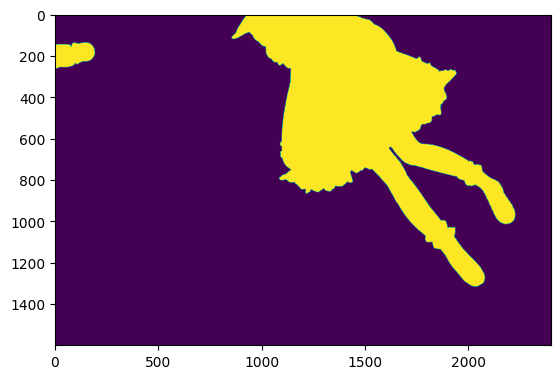

In [3]:
yolo, mas = mask2yolo(mixed_mask,target_cnt,show=True)
plt.imshow(mas)

In [6]:
# 为每个fg都生成一个yolo的
# 生成的yolo格式的mask保存在./datasets/masks_yolo/下
# 生成的叠加后的图片保存在./datasets/mixed_pic/下
# 改成tqdm的形式，可以看到进度条
subpath = "out2/"
if not os.path.exists(mainpath+"masks_yolo/"):
    os.mkdir(mainpath+"masks_yolo/")
if not os.path.exists(mainpath+"mixed_pic/"):
    os.mkdir(mainpath+"mixed_pic/")
if not  os.path.exists(mainpath+"mixed_mask/"):
    os.mkdir(mainpath+"mixed_mask/")

max_target_num = 4
pic_num = 10
for n in tqdm(range(pic_num), desc='Processing images'):
    target_num = np.random.randint(1,max_target_num)
    choice = np.random.choice(len(fgs),target_num)
    fg = []
    mask = []
    for i in choice:
        fg.append(fgs[i])
        mask.append(masks[i])
    bg_cur = bgs[np.random.randint(0,len(bgs))]
    fg_list = [mainpath+fg_path+i for i in fg]
    bg = mainpath+bg_path+bg_cur
    mask_list = [mainpath+masks_path+i for i in mask]
    mixed_pic, mixed_mask, mask_sizes = make_pic(fg_list, bg, mask_list)
    filename = ""
    for i in fg:
        filename += i[:-4]+"_"
    random_name = np.random.randint(0,100000)
    mixed_pic.save(mainpath+"mixed_pic/"+filename+"_"+bg_cur[:-4]+str(random_name)+".jpg")
    #mixed_mask.save(mainpath+"mixed_mask/"+filename+"_"+bg_cur[:-4]+".jpg")
    yolo = mask2yolo(mixed_mask, mask_sizes, show=False)
    with open(mainpath+"masks_yolo/"+filename+"_"+bg_cur[:-4]+str(random_name)+".txt","w") as f:
        f.write(yolo[0])
    

Processing images:   0%|          | 0/10 [00:00<?, ?it/s]

Processing images:  10%|█         | 1/10 [00:01<00:16,  1.86s/it]

min_mask_size:140079.29803921568
142525.0


Processing images:  20%|██        | 2/10 [00:02<00:11,  1.39s/it]

min_mask_size:86863.87843137255
89029.5


Processing images:  30%|███       | 3/10 [00:03<00:08,  1.20s/it]

min_mask_size:37015.490196078434
41105.5


Processing images:  40%|████      | 4/10 [00:06<00:09,  1.61s/it]

min_mask_size:615824.9960784314
620540.5


Processing images:  50%|█████     | 5/10 [00:07<00:07,  1.59s/it]

min_mask_size:108955.74117647059
302236.5


Processing images:  60%|██████    | 6/10 [00:08<00:05,  1.29s/it]

min_mask_size:203883.0823529412
205573.5


Processing images:  70%|███████   | 7/10 [00:09<00:03,  1.15s/it]

min_mask_size:135355.60392156863
144235.0


Processing images:  80%|████████  | 8/10 [00:11<00:02,  1.45s/it]

min_mask_size:64329.79607843137
767437.5


Processing images:  90%|█████████ | 9/10 [00:13<00:01,  1.66s/it]

min_mask_size:78406.6
79108.5
206900.5


Processing images: 100%|██████████| 10/10 [00:15<00:00,  1.55s/it]

min_mask_size:47404.00392156863
288833.5
